# Unsupervised Learning in Python

## [Link to Course](https://www.datacamp.com/courses/unsupervised-learning-in-python)

- Unsupervised learning finds patterns in data
- E.g. clustering customers by their purchases
- Compressing the data using purchase patterns (dimension reduction)

- *Supervised* learning finds patterns for a prediction task
- E.g. classify tumors as benign or cancerous (labels)
- **Unsupervised** learning finds patterns in data
    - but without a specific prediction task in mind

# k-means clustering
- Finds clusters of samples
- Number of clusters must be specified
- Implemented in sklearn

```python

from sklearn.cluster import KMeans

model = KMeans(n_clusters=3)

model.fit(samples)

labels = model.predict(samples)
```
`labels` returns cluster labels indicating, to which cluster a particular sample belongs.

# Cluster labels for new samples

- New samples can be assigned to existing clusters
- k-means remembers the mean of each cluster (the "**centroids**")
- Finds the nearest centroid to each new sample

```python
new_labels = model.predict(new_samples)
```

# Visualizing the data

```python
import matplotlib.pyplot as plt
xs = samples[:,0]
ys = samples[:,2]
plt.scatter(xs, ys, c=labels)

plt.show()
```

In [5]:
% run points.py

In [6]:
# Import KMeans
from sklearn.cluster import KMeans

# Create a KMeans instance with 3 clusters: model
model = KMeans(n_clusters=3)

# Fit model to points
model.fit(points)

# Determine the cluster labels of new_points: labels
labels = model.predict(new_points)

# Print cluster labels of new_points
print(labels)


[2 0 1 2 0 2 0 0 0 1 2 0 0 1 1 0 1 1 0 0 1 0 2 0 2 1 0 1 1 2 2 0 0 0 1 2 0
 0 2 0 1 2 2 1 2 0 1 1 0 0 0 0 1 1 2 2 1 1 1 2 2 0 0 0 2 0 1 0 2 1 2 2 2 0
 2 1 1 2 0 1 2 1 2 0 1 0 1 2 0 0 0 2 0 0 2 1 1 1 1 2 0 2 1 1 2 2 0 2 1 1 2
 1 1 1 0 0 0 0 1 1 0 2 0 1 0 2 1 0 1 1 0 1 0 1 2 0 2 2 0 1 2 0 2 2 1 0 0 2
 1 2 1 0 2 1 1 2 1 0 0 1 0 1 1 0 0 2 0 0 1 2 1 2 2 0 2 0 0 2 2 1 2 2 2 1 0
 0 2 1 2 1 1 0 0 0 2 0 0 0 1 1 2 0 2 2 2 1 0 0 0 0 0 0 1 1 0 1 1 1 1 0 1 1
 0 0 2 1 2 2 1 2 1 2 1 0 0 1 0 0 0 1 2 2 1 0 0 1 0 1 1 0 1 1 2 1 2 2 2 0 1
 1 1 2 0 2 1 2 1 1 0 2 2 2 1 0 0 0 2 0 1 1 0 2 2 1 2 2 1 2 0 2 1 1 1 1 0 1
 1 0 0 2]


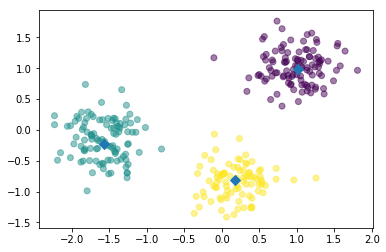

In [9]:
%matplotlib inline
# Import pyplot
import matplotlib.pyplot as plt

# Assign the columns of new_points: xs and ys
xs = new_points[:,0]
ys = new_points[:,1]

# Make a scatter plot of xs and ys, using labels to define the colors
_ = plt.scatter(xs, ys, c=labels, alpha=0.5)

# Assign the cluster centers: centroids
centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
_ = plt.scatter(centroids_x, centroids_y, marker='D', s=50)
plt.show()


# Evaluating a clustering
- Can check correspondence with e.g. iris species
- ... but what if there are no species to check against?
- Measure quality of a clustering
- Informs choice of how many clusters to look for

# Cross tabulation with pandas
- Clusters vs species is a "cross-tabulation"
- Use the pandas library
- Given the species of each sample as a list species

```python
import pandas as pd
df = pd.DataFrame({'labels': labels, 'species': species})

ct = pd.crosstab(df['labels'], df['species'])
```

### How to evaluate a clustering, if there were no species information?

# Measuring clustering quality
- Using only samples and their cluster labels
- A good clustering has tight clusters
- ... and samples in each culster bunched together

# Inertia measures clustering quality
- measures how spread out the clusters are (lower is better)
- Distance form each sample to centroid of its cluster
- After `fit()`, available as attribute `inertia_`

```python
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
model.fit(samples)
print(model.inertia_)
```

- k-means attempts to minimize the inertia when choosing clusters

# How many clusters to choose?
- A good clustering has tight clusters (so low inertia)
- ... but not too many clusters!
- Choose an "elbow" in the inertia plot
- Where inertia begins to decrease more slowly

## [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/seeds)

In [10]:
import pandas as pd

In [43]:
samples_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt', delimiter='\t', error_bad_lines=False, header=None)

b'Skipping line 8: expected 8 fields, saw 10\nSkipping line 36: expected 8 fields, saw 10\nSkipping line 61: expected 8 fields, saw 9\nSkipping line 69: expected 8 fields, saw 9\nSkipping line 107: expected 8 fields, saw 9\nSkipping line 136: expected 8 fields, saw 9\nSkipping line 170: expected 8 fields, saw 9\nSkipping line 171: expected 8 fields, saw 9\nSkipping line 173: expected 8 fields, saw 9\nSkipping line 202: expected 8 fields, saw 9\nSkipping line 204: expected 8 fields, saw 9\n'


In [47]:
features = samples_df.drop(columns=7)
samples = np.array(features)

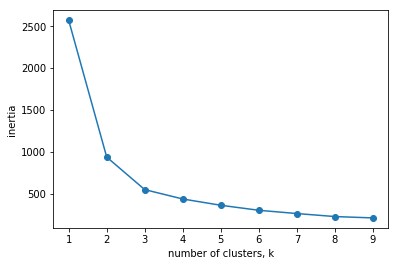

In [50]:
ks = range(1, 10)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(samples)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


# Inertia
### [Overview](http://scikit-learn.org/stable/modules/clustering.html#k-means)

- The k-means algorithm divides a set of `N` samples `X` into `K` disjoint clusters `C`, each described by the mean $\mu_{j}$ of the samples ("centroids") in the cluster.

# $$\sum_{i=0}^{n}\underset{\mu_{j} \in C}{min}(\left \| x_{i} - \mu_{j} \right \|^{2})$$

In [57]:
variety = samples_df[7]
seed_map = {1: 'Kama wheat', 2: 'Rosa wheat', 3: 'Canadian wheat'}
var = variety.map(seed_map)
varieties = np.array(var)

In [58]:
# Create a KMeans model with 3 clusters: model
model = KMeans(n_clusters=3)

# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(samples)

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['varieties'])

# Display ct
print(ct)

varieties  Canadian wheat  Kama wheat  Rosa wheat
labels                                           
0                      64           8           0
1                       0           1          59
2                       1          57           9


# Transforming features for better clustering

In [71]:
wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
wine.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [72]:
wine_features = wine.drop(columns=0)
wine_labels = wine[0]
wine_samples = np.array(wine_features)

In [73]:
model = KMeans(n_clusters=3)
labels = model.fit_predict(wine_samples)

In [74]:
wine_map = {1: 'Barolo', 2: 'Grignolino', 3: 'Barbera'}

wine_labels = wine_labels.map(wine_map)
wine_target = np.array(wine_labels)

In [75]:
df = pd.DataFrame({'labels': labels, 'varieties': wine_target})

In [76]:
ct = pd.crosstab(df['labels'], df['varieties'])

print(ct)

varieties  Barbera  Barolo  Grignolino
labels                                
0               29      13          20
1                0      46           1
2               19       0          50


# Feature variances
- The main issue here is the variance in the different features.
- Variance of a feature measures spread of its values

# StandardScaler
- In k-means: feature variance = feature influence
- The features need to be scaled so that they all have equal variance.
- `StandardScaler` transforms each feature to have mean 0 and variance 1
- Features after the transformation are said to be "standardized"

In [77]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(wine_samples)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [78]:
samples_scaled = scaler.transform(wine_samples)

# Similar method initialization

- `StandardScaler` and `KMeans` have similar methods
- Use `fit()` / `transform()` with `StandardScaler`
- Use `fit()` / `predict()` with `KMeans`

- Need to perform two steps: `StandardScaler`, then `KMeans`
- Use sklearn pipeline to combine multiple steps
- Data flows from one step into the next

In [80]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
kmeans = KMeans(n_clusters=3)

from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(scaler, kmeans)

pipeline.fit(wine_samples)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0))])

In [82]:
labels = pipeline.predict(wine_samples)

df = pd.DataFrame({'labels': labels, 'varieties': wine_target})

ct = pd.crosstab(df['labels'], df['varieties'])

print(ct)

varieties  Barbera  Barolo  Grignolino
labels                                
0               48       0           3
1                0      59           3
2                0       0          65


# sklearn preprocessing steps
- `StandardScaler` is a "preprocessing" step
- `MaxAbsScaler` and `Normalizer` are other examples

In [3]:
import pandas as pd
fish = pd.read_csv('fish.csv', header=None)
fish.head()

,0,1,2,3,4,5,6
0,Bream,242.0,23.2,25.4,30.0,38.4,13.4
1,Bream,290.0,24.0,26.3,31.2,40.0,13.8
2,Bream,340.0,23.9,26.5,31.1,39.8,15.1
3,Bream,363.0,26.3,29.0,33.5,38.0,13.3
4,Bream,430.0,26.5,29.0,34.0,36.6,15.1


In [4]:
# Perform the necessary imports
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Create scaler: scaler
scaler = StandardScaler()

# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters=4)

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, kmeans)

In [8]:
samples = fish.drop(columns=0)
species = fish[0]

In [9]:
# Import pandas
import pandas as pd

# Fit the pipeline to samples
pipeline.fit(samples)

# Calculate the cluster labels: labels
labels = pipeline.predict(samples)

# Create a DataFrame with labels and species as columns: df
df = pd.DataFrame({'labels': labels, 'species': species})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['species'])

# Display ct
print(ct)

species  Bream  Pike  Roach  Smelt
labels                            
0           33     0      1      0
1            0     0      0     13
2            0    17      0      0
3            1     0     19      1


In [10]:
stocks = pd.read_csv('company-stock-movements-2010-2015-incl.csv')
stocks.head()

,Unnamed: 0,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
0,Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
1,AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
2,Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,...,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
3,American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,...,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
4,Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,...,1.559997,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998


In [19]:
movements = stocks.drop(columns='Unnamed: 0').values

In [20]:
# Import Normalizer
from sklearn.preprocessing import Normalizer

# Create a normalizer: normalizer
normalizer = Normalizer()

# Create a KMeans model with 10 clusters: kmeans
kmeans = KMeans(n_clusters=10)

# Make a pipeline chaining normalizer and kmeans: pipeline
pipeline = make_pipeline(normalizer, kmeans)

# Fit pipeline to the daily price movements
pipeline.fit(movements)

Pipeline(memory=None,
     steps=[('normalizer', Normalizer(copy=True, norm='l2')), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0))])

In [23]:
companies = stocks['Unnamed: 0']

In [24]:
# Import pandas
import pandas as pd

# Predict the cluster labels: labels
labels = pipeline.predict(movements)

# Create a DataFrame aligning labels and companies: df
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster label
print(df.sort_values(by='labels'))

    labels                           companies
1        0                                 AIG
26       0                      JPMorgan Chase
3        0                    American express
5        0                     Bank of America
18       0                       Goldman Sachs
55       0                         Wells Fargo
16       0                   General Electrics
15       0                                Ford
37       1                            Novartis
19       1                     GlaxoSmithKline
43       1                                 SAP
49       1                               Total
42       1                   Royal Dutch Shell
31       1                           McDonalds
25       1                   Johnson & Johnson
52       1                            Unilever
54       1                            Walgreen
39       1                              Pfizer
6        1            British American Tobacco
56       1                            Wal-Mart
33       1   

# Visualisations communicate insight
- "t-SNE":Creates a 2D map of a dataset
- "Hierarchical clustering"

# A hierarchy of groups
- Groups of living things can form a hierarchy
- Clusters are contained in one another

# Hierarchical clustering
- Every country (sample) begins in a separate cluster
- At each step, the two closest clusters are merged
- Continue until all countries in a single cluster
- This is "[agglomerative](https://en.wikipedia.org/wiki/Hierarchical_clustering)" hierarchical clustering. "Divisive" clustering works the other way around.

```python
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
mergings = linkage(samples, method='complete')
dendrogram(mergings, labels=country_names, leaf_rotation=90, leaf_font_size=6)
plt.show()
```

b'Skipping line 8: expected 8 fields, saw 10\nSkipping line 36: expected 8 fields, saw 10\nSkipping line 61: expected 8 fields, saw 9\nSkipping line 69: expected 8 fields, saw 9\nSkipping line 107: expected 8 fields, saw 9\nSkipping line 136: expected 8 fields, saw 9\nSkipping line 170: expected 8 fields, saw 9\nSkipping line 171: expected 8 fields, saw 9\nSkipping line 173: expected 8 fields, saw 9\nSkipping line 202: expected 8 fields, saw 9\nSkipping line 204: expected 8 fields, saw 9\n'


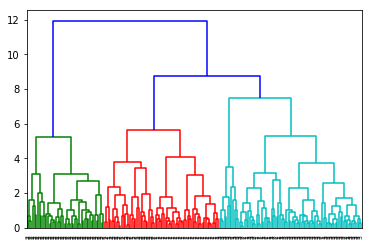

In [29]:
import numpy as np
samples_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt', delimiter='\t', error_bad_lines=False, header=None)
features = samples_df.drop(columns=7)
samples = np.array(features)

varieties = samples_df[7].values

# Perform the necessary imports
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Calculate the linkage: mergings
mergings = linkage(samples,method='complete')

# Plot the dendrogram, using varieties as labels
dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()

In [32]:
samples_df.shape

(199, 8)

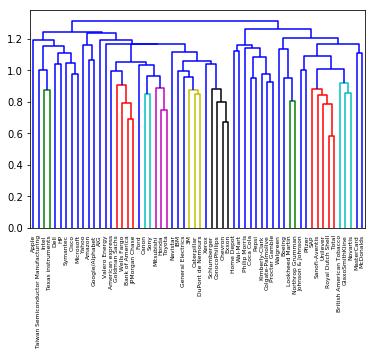

In [36]:
# Import normalize
from sklearn.preprocessing import normalize

# Normalize the movements: normalized_movements
normalized_movements = normalize(movements)

# Calculate the linkage: mergings
mergings = linkage(normalized_movements, method='complete')

# Plot the dendrogram
dendrogram(mergings, labels=companies.values, leaf_rotation=90, leaf_font_size=6)
plt.show()

# Cluster labels in hierarchical clustering

- Not only a visualisation tool
- Cluster labels at any intermediate stage can be recovered
- For use in e.g. cross-tabulations

- Height on dendrogram = distance between merging clusters
# Distance between clusters
- Defined by a "linkage method"
- Specified via method parameter, e.g. `linkage(samples, method='complete')`
- In `'complete'` linkage: distance between clusters is max. distance between their samples
- Different linkage method, different hierarchical clustering.

# Extracting cluster labels using fcluster
- Use the `fcluster` method
- Returns a NumPy array of cluster labels

```python
from scipy.cluster.hierarchy import linkage
mergings = linkage(samples, method='complete')
from scipy.cluster.hierarchy import fcluster
labels = fcluster(mergings, 15, criterion='distance')
print(labels)
```

## Aligning cluster labels with country names
- Given a list of strings `country_names`:

```python
import pandas as pd
pairs = pd.DataFrame({'labels': labels, 'countries': country_names})
print(pairs.sort_values('labels'))
```

```python
# Perform the necessary imports
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

# Calculate the linkage: mergings
mergings = linkage(samples, method='single')

# Plot the dendrogram
dendrogram(mergings, labels=country_names, leaf_rotation=90, leaf_font_size=6)
plt.show()
```

```python
# Perform the necessary imports
import pandas as pd
from scipy.cluster.hierarchy import fcluster

# Use fcluster to extract labels: labels
labels = fcluster(mergings, 6, criterion='distance')

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['varieties'])

# Display ct
print(ct)
```

# t-SNE for 2-dimensional maps

- t-SNE = "t-distributed stochastic neighbor embedding"
- Maps samples to 2D space (or 3D)
- Map approximately preserves nearness of samples
- Great for inspecting datasets

# t-SNE on the iris dataset
- Iris dataset has 4 measurements, so samples are 4-dimensional
- t-SNE maps samples to 2D space
- t-SNE didn't know that there were different species
- ... yet kept the species mostly separate


# t-SNE in sklearn
```python
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
model = TSNE(learning_rate=100)
transformed = model.fit_transform(samples)
xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs, ys, c=species)
plt.show()
```

# t-SNE has only fit_transform()
- Has a `fit_transform()` method
- Simultaneously fits the model and transforms the data
- Has no separate `fit()` or `transform()` methods
- Can't extend the map to include new data samples
- Must start over each time.

# t-SNE learning rate
- Choose learning rate for the dataset
- Wrong choice: points bunch together
- Try values between 50 and 200

# Different every time
- t-SNE features are different every time
- Piedmont wines, 3 runs, 3 different scatter plots.
- ... however: The wine varieties (=colors) have same position relative to one another.

In [49]:
samples_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt', delimiter='\t', error_bad_lines=False, header=None)
features = samples_df.drop(columns=7)
samples = np.array(features)

variety_numbers = samples_df[7]
# variety_numbers = variety_numbers.reshape(-1,1)
variety_numbers = list(variety_numbers)

b'Skipping line 8: expected 8 fields, saw 10\nSkipping line 36: expected 8 fields, saw 10\nSkipping line 61: expected 8 fields, saw 9\nSkipping line 69: expected 8 fields, saw 9\nSkipping line 107: expected 8 fields, saw 9\nSkipping line 136: expected 8 fields, saw 9\nSkipping line 170: expected 8 fields, saw 9\nSkipping line 171: expected 8 fields, saw 9\nSkipping line 173: expected 8 fields, saw 9\nSkipping line 202: expected 8 fields, saw 9\nSkipping line 204: expected 8 fields, saw 9\n'


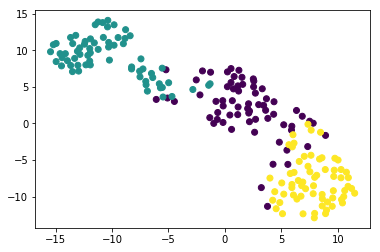

In [50]:
# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=200)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(samples)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.scatter(xs, ys, c=variety_numbers)
plt.show()

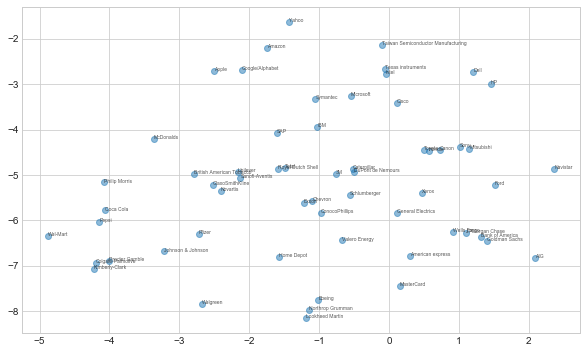

In [55]:
import matplotlib.pyplot as plt
# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=50)

# Apply fit_transform to normalized_movements: tsne_features
tsne_features = model.fit_transform(normalized_movements)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1th feature: ys
ys = tsne_features[:,1]

# Scatter plot

plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('seaborn-whitegrid')

plt.scatter(xs, ys, alpha=0.5)

# Annotate the points
for x, y, company in zip(xs, ys, companies):
    plt.annotate(company, (x, y), fontsize=5, alpha=0.75)
plt.show()

# Visualizing the PCA transformation

# Dimension reduction
- More efficient storage and computation
- Remove less-informative "noise" features
- ... which cause problems for prediction tasks, e.g. classification, regression

## Principle Component Analysis
- Fundamental dimension reduction technique
- First step "decorrelation" 
- Second step reduces dimension

### PCA aligns data with axes
- Rotates data samples to be aligned with axes
- Shifts data samples so they have mean 0

### PCA follows the fit/transform pattern
- PCA a scikit-learn component like KMeans or StandardScaler
- `fit()` learns the transformation from given data
- `transform()` applies the learned transformation
- `transform()` can also be applied to new data

```python
from sklearn.decomposition import PCA
model = PCA()
model.fit(samples)

# Produce a new array of transformed samples
transformed = model.transform(samples)
```

- The new transformed array has the same number of rows and columns as the original array.
    - Rows of `transformed` correspond to samples
    - Columns of `transformed` are the "PCA features"
    - Row gives PCA feature values of corresponding sample
    
### PCA features are not correlated
- Features of dataset are often correlated, e.g. total_phenols and od280
- PCA aligns the data with axes
- Resulting PCA features are not linearly correlated ("decorrelation")

# Pearson correlation
- Measures linear correlation of features
- Value between -1 and 1
- Value of 0 means no linear correlation

# Principal components
- "Principal components" = direction of variance
- PCA aligns principal components with the axes
- Available as `components_` attribute of PCA object
```python 
print(model.components_)
```
- Each row defines displacement from mean

In [59]:
grains_df = pd.read_csv('seeds-width-vs-length.csv', header=None)
print(grains_df.head())

grains = np.array(grains_df)

       0      1
0  3.312  5.763
1  3.333  5.554
2  3.337  5.291
3  3.379  5.324
4  3.562  5.658


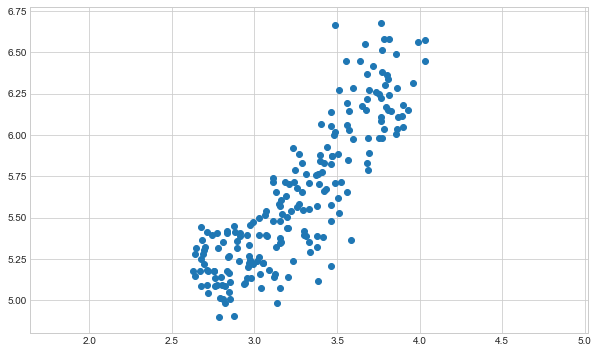

0.8604149377143467


In [60]:
# Perform the necessary imports
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Assign the 0th column of grains: width
width = grains[:,0]

# Assign the 1st column of grains: length
length = grains[:,1]

# Scatter plot width vs length
plt.scatter(width, length)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation
correlation, pvalue = pearsonr(width, length)

# Display the correlation
print(correlation)


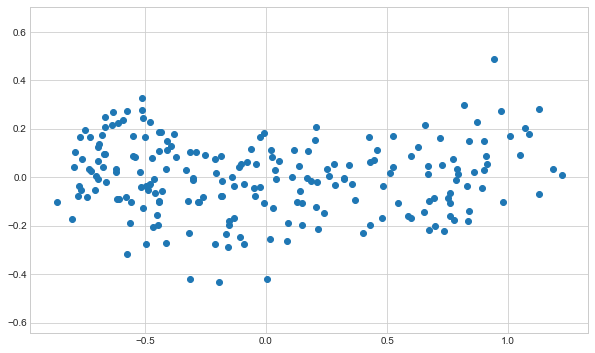

7.474656899453041e-17


In [61]:
# Import PCA
from sklearn.decomposition import PCA

# Create PCA instance: model
model = PCA()

# Apply the fit_transform method of model to grains: pca_features
pca_features = model.fit_transform(grains)

# Assign 0th column of pca_features: xs
xs = pca_features[:,0]

# Assign 1st column of pca_features: ys
ys = pca_features[:,1]

# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
print(correlation)

# Intrinsic dimension of a flight path
- 2 features: longitude and latitude at points along a flight path
- Dataset *appears* to be 2-dimensional
- But can approximate using one feature: displacement along flight path

- **Intrinsic dimension** = number of features needed to approximate the dataset
- Essential idea behind dimension reduction
- What is the most compact representation of the samples?
- Can be detected with PCA

## Versicolor dataset
- "versicolor", one of the iris species
- Only 3 features: sepal length, sepal width, and petal width
- Samples are points in 3D space
    - Samples lie close to a flat 2-dimensional sheet
    - So can be approximated using 2 features
- Scatter plots work only if samples have 2 or 3 features
- PCA identifies intrinsic dimension when samples have *any number* of features
- Intrinsic dimension = number of PCA features with significant variance

# Variance and intrinsic dimension
- Intrinsic dimension is number of PCA features with significant variance

# Plotting the variances of PCA features

```python
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(samples)

features = range(pca.n_components_)

plt.bar(features, pca.explained_variance_)
plt.ticks(features)
plt.ylabel('variance')
plt.xlabel('PCA feature')

plt.show()
```

# Intrinsic dimension can be ambiguous
- Intrinsic dimension is an idealization
- ... there is not always one correct answer!
- Piedmont wines: could argue for 2, or for 3, or more

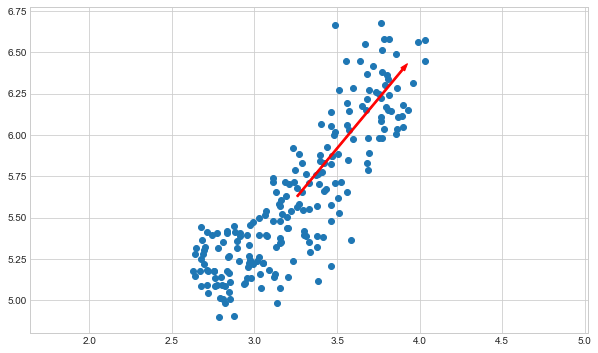

In [62]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Make a scatter plot of the untransformed points
plt.scatter(grains[:,0], grains[:,1])

# Create a PCA instance: model
model = PCA()

# Fit model to points
model.fit(grains)

# Get the mean of the grain samples: mean
mean = model.mean_

# Get the first principal component: first_pc
first_pc = model.components_[0,:]

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)

# Keep axes on same scale
plt.axis('equal')
plt.show()

In [63]:
fish = pd.read_csv('fish.csv', header=None)
fish.head()

,0,1,2,3,4,5,6
0,Bream,242.0,23.2,25.4,30.0,38.4,13.4
1,Bream,290.0,24.0,26.3,31.2,40.0,13.8
2,Bream,340.0,23.9,26.5,31.1,39.8,15.1
3,Bream,363.0,26.3,29.0,33.5,38.0,13.3
4,Bream,430.0,26.5,29.0,34.0,36.6,15.1


In [64]:
fish_features = fish.drop(columns=0)
samples = np.array(fish_features)

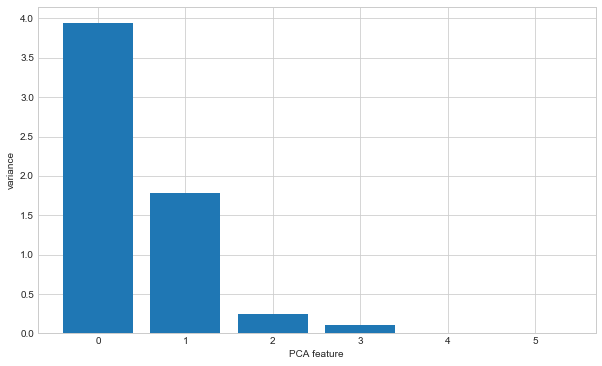

In [65]:
# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, pca)

# Fit the pipeline to 'samples'
pipeline.fit(samples)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

# Dimension reduction
- Represents same data, using less features
- Important part of machine-learning pipelines
- Can be performed using PCA

## With PCA
- Specify how many features to keep
- E.g. `PCA(n_components=2)`
- Keeps the first 2 PCA features
- Intrinsic dimension is a good choice

```python
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(samples)
transformed = pca.transform(samples)
print(transformed.shape)
```

## Dataset in 2 dimensions

```python
import matplotlib.pyplot as plt
xs = transformed[:,0]
ys = transformed[:,1]

plt.scatter(xs, ys, c=species)
plt.show()
```

- Discards low variance PCA features
- Assumes the high variance features are informative
- Assumption typically holds in practice (e.g. for iris)

# Word frequency arrays
- Rows represent documents, columns represent words
- Entries measure presence of each word in each document
- ... measure using "tf-idf"

# Sparse arrays and csr_matrix
- Array is "sparse": most entries are zero
- Can use `scipy.sparse.csr_matrix` instead of NumPy array
- `csr_matrix` remembers only the non-zero entries (saves considerable space in memory)

# TruncatedSVD and csr_matrix
- scikit-learn PCA doesn't support csr_matrix
- Use scikit-learn TruncatedSVD instead
- Performs same transformation

```python
from sklearn.decomposition import TruncatedSVD
model = TruncatedSVD(n_components=3)
model.fit(documents) # documents in csr_matrix

transformed = model.transform(documents)
```

In [73]:
scaler = StandardScaler()
scaled_samples = scaler.fit_transform(samples)

In [74]:
# Import PCA
from sklearn.decomposition import PCA

# Create a PCA model with 2 components: pca
pca = PCA(n_components=2)

# Fit the PCA instance to the scaled samples
pca.fit(scaled_samples)

# Transform the scaled samples: pca_features
pca_features = pca.transform(scaled_samples)

# Print the shape of pca_features
print(pca_features.shape)

(85, 2)


In [75]:
documents = ['cats say meow', 'dogs say woof', 'dogs chase cats']

# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer: tfidf
tfidf = TfidfVectorizer()

# Apply fit_transform to document: csr_mat
csr_mat = tfidf.fit_transform(documents)

# Print result of toarray() method
print(csr_mat.toarray())

# Get the words: words
words = tfidf.get_feature_names()

# Print words
print(words)

[[0.51785612 0.         0.         0.68091856 0.51785612 0.        ]
 [0.         0.         0.51785612 0.         0.51785612 0.68091856]
 [0.51785612 0.68091856 0.51785612 0.         0.         0.        ]]
['cats', 'chase', 'dogs', 'meow', 'say', 'woof']


In [76]:
# Perform the necessary imports
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

# Create a TruncatedSVD instance: svd
svd = TruncatedSVD(n_components=50)

# Create a KMeans instance: kmeans
kmeans = KMeans(n_clusters=6)

# Create a pipeline: pipeline
pipeline = make_pipeline(svd, kmeans)

In [77]:
import pandas as pd
from scipy.sparse import csr_matrix

df = pd.read_csv('wikipedia-vectors.csv', index_col=0)
articles = csr_matrix(df.transpose())
titles = list(df.columns)

In [78]:
# Import pandas
import pandas as pd

# Fit the pipeline to articles
pipeline.fit(articles)

# Calculate the cluster labels: labels
labels = pipeline.predict(articles)

# Create a DataFrame aligning labels and titles: df
df = pd.DataFrame({'label': labels, 'article': titles})

# Display df sorted by cluster label
print(df.sort_values('label'))

    label                                        article
29      0                               Jennifer Aniston
22      0                              Denzel Washington
23      0                           Catherine Zeta-Jones
24      0                                   Jessica Biel
25      0                                  Russell Crowe
26      0                                     Mila Kunis
27      0                                 Dakota Fanning
28      0                                  Anne Hathaway
21      0                             Michael Fassbender
20      0                                 Angelina Jolie
51      1                                     Nate Ruess
52      1                                     The Wanted
53      1                                   Stevie Nicks
54      1                                 Arctic Monkeys
55      1                                  Black Sabbath
56      1                                       Skrillex
57      1                      